# 2 偏差图deviation

## 2.2 发散型文本图

比发散型条形图多了带颜色的文字

### 2.2.1 导入需要的库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2.2.2 绘制文本的函数

**plt.text()**

In [2]:
plt.text?

>重要参数：
>>x,y：放置文本的位置。默认情况下，就是数据坐标<br>
>>s：要显示的文本内容<br>
>>fontdict：用于覆盖默认文本属性的字典。fontdict的默认值是None，默认值由rc参数决定<br>

Text([0.72512448], [0.87198341], 'text')

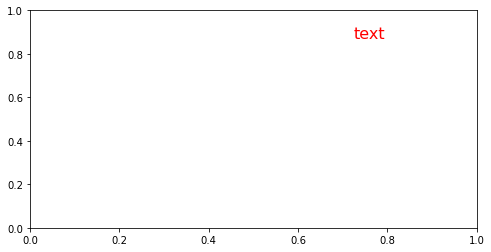

In [3]:
#绘制简单的文本图

#定义数据，都是[0,1)之间的随机数
x = np.random.rand(1)
y = np.random.rand(1)

#创建画布，并设定画布尺寸
plt.figure(figsize = (8,4))

#绘制图形
plt.text(x,y,'text',fontdict={'size':16,'color':'r'})

【注意】plt.text()函数一次只能标注一个位置的文本

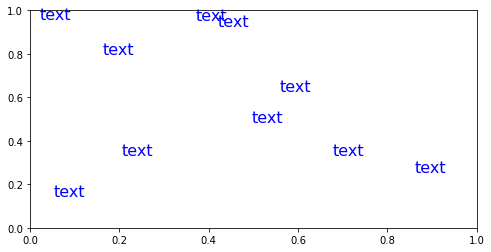

In [4]:
#创建画布，并设定画布尺寸
plt.figure(figsize = (8,4))

#绘制图形
for i in range(10):
    x = np.random.rand(1)
    y = np.random.rand(1)
    plt.text(x,y,'text',fontdict={'size':16,'color':'b'})

### 2.2.3 绘制目标图像

#### 2.2.3.1 准备数据

In [6]:
df = pd.read_csv('http://github.com/selva86/datasets/raw/master/mtcars.csv')

In [7]:
x = df.loc[:, ['mpg']] #提取目标数据
df['mpg_z'] = (x - x.mean()) / x.std() #对目标数据进行z-score标准化处理
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']] #生成颜色标签列
df.sort_values('mpg_z', inplace = True) #根据标准化后的数据对整个数据集进行排序
df.reset_index(inplace = True, drop = True) #重置数据集的索引

In [8]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


#### 2.2.3.2 绘制基础图形并添加文本信息

In [9]:
#保留两位小数
round(df.mpg_z.values[0],2)

-1.83

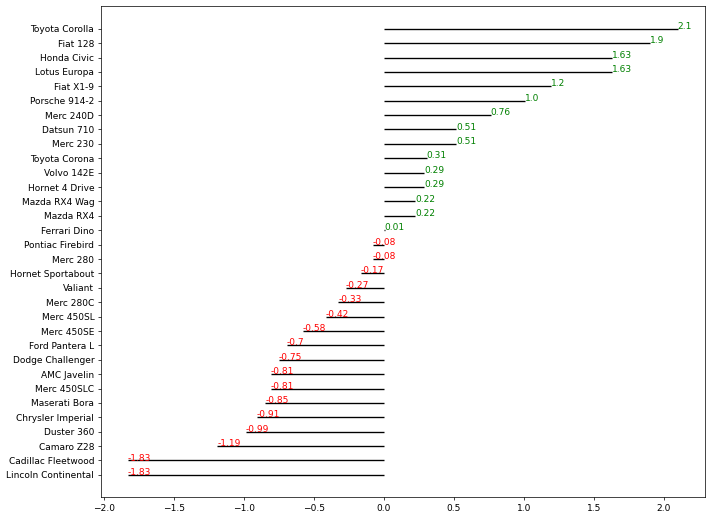

In [10]:
#创建画布
plt.figure(figsize = (12,10), dpi = 65)

#绘制基础图形
plt.hlines(y = df.cars, xmin = 0, xmax = df.mpg_z)

#添加文本
for i in range(df.shape[0]): #对每一条数据进行循环
    x = df.mpg_z[i] #获取一个x的值
    y = df.index[i] #获取一个y的值
    s = str(round(df.mpg_z[i], 2)) #获取一个需要显示的文本
    plt.text(x, y, s, color = df.colors[i]) #绘制简单的文本图

#### 2.2.3.3 修正文本信息

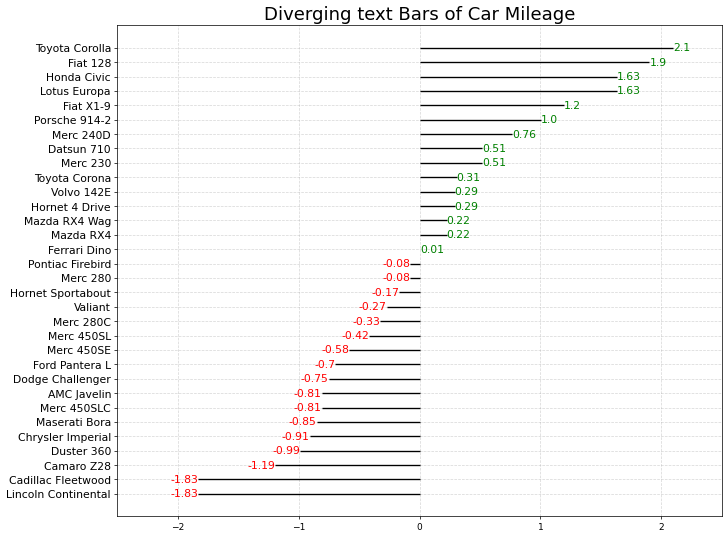

In [12]:
#创建画布
plt.figure(figsize = (12,10), dpi = 65)

#绘制基础图形
plt.hlines(y = df.cars, xmin = 0, xmax = df.mpg_z)

#添加文本
for i in range(df.shape[0]): #对每一条数据进行循环
    x = df.mpg_z[i] #获取一个x的值
    y = df.index[i] #获取一个y的值
    s = str(round(df.mpg_z[i], 2)) #获取一个需要显示的文本
    plt.text(x, y, s
            ,fontdict = {'color': df.colors[i], 'size': 12} #添加颜色和尺寸，以字典形式打包
            ,horizontalalignment = 'right' if x < 0 else 'left' #水平对齐参数，有left、right、center三种选择，文本的哪一边
            ,verticalalignment = 'center' #垂直对齐参数，常用的有bottom、top、center三种选择
            )

#添加装饰
plt.yticks(fontsize = 12) #y轴刻度文字大小
plt.title('Diverging text Bars of Car Mileage', fontdict = {'size': 20}) #设置图形标题
plt.xlim(-2.5, 2.5) #设定x轴的最大最小值
plt.grid(linestyle = '--', alpha = 0.5) #配置网格线

#### 2.2.3.4 源码解读

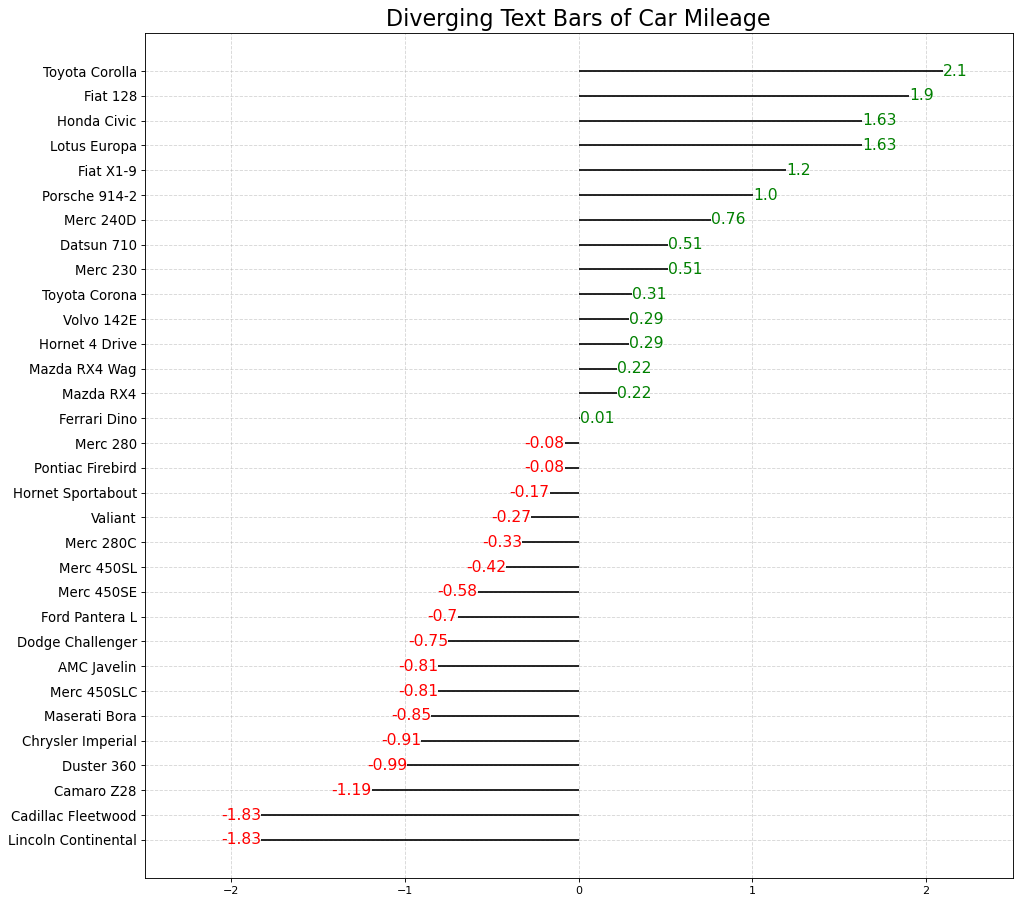

In [16]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2)
                ,horizontalalignment = 'right' if x < 0 else 'left'
                ,verticalalignment='center'
                ,fontdict={'color':'red' if x < 0 else 'green', 'size':14}
                )

# Decorations
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

zip()函数解读：

* 这是一个压缩函数，返回一个zip对象<br>
* 其.\__next__()方法返回一个元组，其中第i个元素来自第i个可迭代参数<br>
* .\__next__()方法一直持续到参数序列中最短的那一列元素耗尽，然后它引发停止迭代（StopIteration）

In [17]:
zip([1,2,3],['a','b','c','d'],[2,3,4,5,6])

In [18]:
a = zip([1,2,3],['a','b','c','d'],[2,3,4,5,6])

In [19]:
a.__next__()

(1, 'a', 2)

In [20]:
a.__next__()

(2, 'b', 3)

In [21]:
a.__next__()

(3, 'c', 4)

In [22]:
a.__next__()

StopIteration: 

In [23]:
[*zip([1,2,3],['a','b','c','d'],[2,3,4,5,6])]

[(1, 'a', 2), (2, 'b', 3), (3, 'c', 4)]

In [24]:
#打开代码中的zip包
[*zip(df.mpg_z, df.index, df.mpg_z)]

[(-1.829979166172032, 0, -1.829979166172032),
 (-1.829979166172032, 1, -1.829979166172032),
 (-1.1916643929384532, 2, -1.1916643929384532),
 (-0.9880490925406522, 3, -0.9880490925406522),
 (-0.9086043848420426, 4, -0.9086043848420426),
 (-0.8497278530288013, 5, -0.8497278530288013),
 (-0.8108033966920268, 6, -0.8108033966920268),
 (-0.8108033966920268, 7, -0.8108033966920268),
 (-0.7528937518510942, 8, -0.7528937518510942),
 (-0.6955418632876901, 9, -0.6955418632876901),
 (-0.5824488394660795, 10, -0.5824488394660795),
 (-0.41662004701255756, 11, -0.41662004701255756),
 (-0.3263546881363668, 12, -0.3263546881363668),
 (-0.2728032088912642, 13, -0.2728032088912642),
 (-0.16701544823773806, 14, -0.16701544823773806),
 (-0.08014871317057216, 15, -0.08014871317057216),
 (-0.08014871317057216, 16, -0.08014871317057216),
 (0.005594118756871527, 17, 0.005594118756871527),
 (0.22356335588724, 18, 0.22356335588724),
 (0.22356335588724, 19, 0.22356335588724),
 (0.2892648952458959, 20, 0.28926489

In [26]:
#也可以用循环的方式打开
for x,y,z in zip(df.mpg_z, df.index, df.mpg_z):
    print(x,y,z)

-1.829979166172032 0 -1.829979166172032
-1.829979166172032 1 -1.829979166172032
-1.1916643929384532 2 -1.1916643929384532
-0.9880490925406522 3 -0.9880490925406522
-0.9086043848420426 4 -0.9086043848420426
-0.8497278530288013 5 -0.8497278530288013
-0.8108033966920268 6 -0.8108033966920268
-0.8108033966920268 7 -0.8108033966920268
-0.7528937518510942 8 -0.7528937518510942
-0.6955418632876901 9 -0.6955418632876901
-0.5824488394660795 10 -0.5824488394660795
-0.41662004701255756 11 -0.41662004701255756
-0.3263546881363668 12 -0.3263546881363668
-0.2728032088912642 13 -0.2728032088912642
-0.16701544823773806 14 -0.16701544823773806
-0.08014871317057216 15 -0.08014871317057216
-0.08014871317057216 16 -0.08014871317057216
0.005594118756871527 17 0.005594118756871527
0.22356335588724 18 0.22356335588724
0.22356335588724 19 0.22356335588724
0.2892648952458959 20 0.2892648952458959
0.2892648952458959 21 0.2892648952458959
0.3055941099428845 22 0.3055941099428845
0.514515017495765 23 0.5145150174